In [345]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [346]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [347]:
df = pd.read_csv("water_potability.csv")

In [348]:
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#Handling null value

In [349]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [350]:
print("number of rows: ", df.shape[0])
print("number of column: ", df.shape[1])
df.Potability.value_counts()

number of rows:  3276
number of column:  10


0    1998
1    1278
Name: Potability, dtype: int64

In [351]:
#df = df.dropna() # dropping all row with null values
df_notpotable  = df[df['Potability']==0]
df_potable = df[df['Potability']==1] 


In [352]:
df_notpotable.isnull().sum()

ph                 314
Hardness             0
Solids               0
Chloramines          0
Sulfate            488
Conductivity         0
Organic_carbon       0
Trihalomethanes    107
Turbidity            0
Potability           0
dtype: int64

In [353]:
df_potable.isnull().sum()

ph                 177
Hardness             0
Solids               0
Chloramines          0
Sulfate            293
Conductivity         0
Organic_carbon       0
Trihalomethanes     55
Turbidity            0
Potability           0
dtype: int64

In [354]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy = 'mean')

#for df_notpotable
impute.fit(df_notpotable[['ph']])
impute.fit(df_notpotable[['Sulfate']])
impute.fit(df_notpotable[['Trihalomethanes']])

df_notpotable['ph'] = impute.transform(df_notpotable[['ph']])
df_notpotable['Sulfate'] = impute.transform(df_notpotable[['Sulfate']])
df_notpotable['Trihalomethanes'] = impute.transform(df_notpotable[['Trihalomethanes']])

#for df_potable
impute.fit(df_potable[['ph']])
impute.fit(df_potable[['Sulfate']])
impute.fit(df_potable[['Trihalomethanes']])

df_potable['ph'] = impute.transform(df_potable[['ph']])
df_potable['Sulfate'] = impute.transform(df_potable[['Sulfate']])
df_potable['Trihalomethanes'] = impute.transform(df_potable[['Trihalomethanes']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [355]:
df_notpotable.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [356]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [357]:
df_potable.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [358]:
df = pd.concat([df_notpotable, df_potable])


In [359]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,66.303555,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,66.303555,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,66.303555,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [360]:
df.shape

(3276, 10)

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 281.5 KB


# Normalizing the Dataset

In [362]:
df = df.sample(frac = 1) # shuffling the rows

In [363]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2790,7.266781,178.257710,27468.681707,6.043959,314.390628,400.624987,13.665328,87.131873,3.919827,1
122,66.303555,230.809482,27418.781044,7.136498,369.310008,274.660597,9.578585,72.376909,4.197595,0
3176,8.610963,125.158770,32079.774815,9.844921,264.052839,342.205252,12.947376,53.950269,4.614400,1
884,5.403196,185.643523,27509.893425,8.257587,66.303555,587.378692,10.024039,63.397500,3.871463,0
2541,5.735724,158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954,0


In [364]:
x = df.drop('Potability', axis = 1) #getting x
y = df['Potability'] #getting y 

In [365]:
from sklearn.preprocessing import MinMaxScaler
#Now, lets scale all the value in x within 0 to 1...
scaler = MinMaxScaler() # creating object of MinMaxScaler
scaler.fit(x)

x = scaler.transform(x)

x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8
0,0.109210,0.474536,0.445730,0.445555,0.598194,0.383209,0.439285,0.700896,0.466974
1,0.996451,0.665153,0.444911,0.531076,0.730616,0.162937,0.282704,0.581192,0.519492
2,0.129411,0.281933,0.521438,0.743086,0.476818,0.281051,0.411777,0.431701,0.598298
3,0.081203,0.501326,0.446407,0.618833,0.000000,0.709782,0.299772,0.508344,0.457830
4,0.086200,0.402212,0.411158,0.577425,0.750469,0.676427,0.437802,0.610199,0.620713
...,...,...,...,...,...,...,...,...,...
3271,0.090992,0.655681,0.162461,0.440859,0.579883,0.454683,0.575829,0.524105,0.650248
3272,0.996451,0.497783,0.230636,0.608838,0.647293,0.508598,0.531550,0.592009,0.592382
3273,0.116842,0.534299,0.221800,0.411047,0.000000,0.245553,0.638733,0.531920,0.465460
3274,0.128961,0.385492,0.322619,0.572187,0.594563,0.593371,0.482053,0.595397,0.270967


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32da021d90>,
      dtype=object)

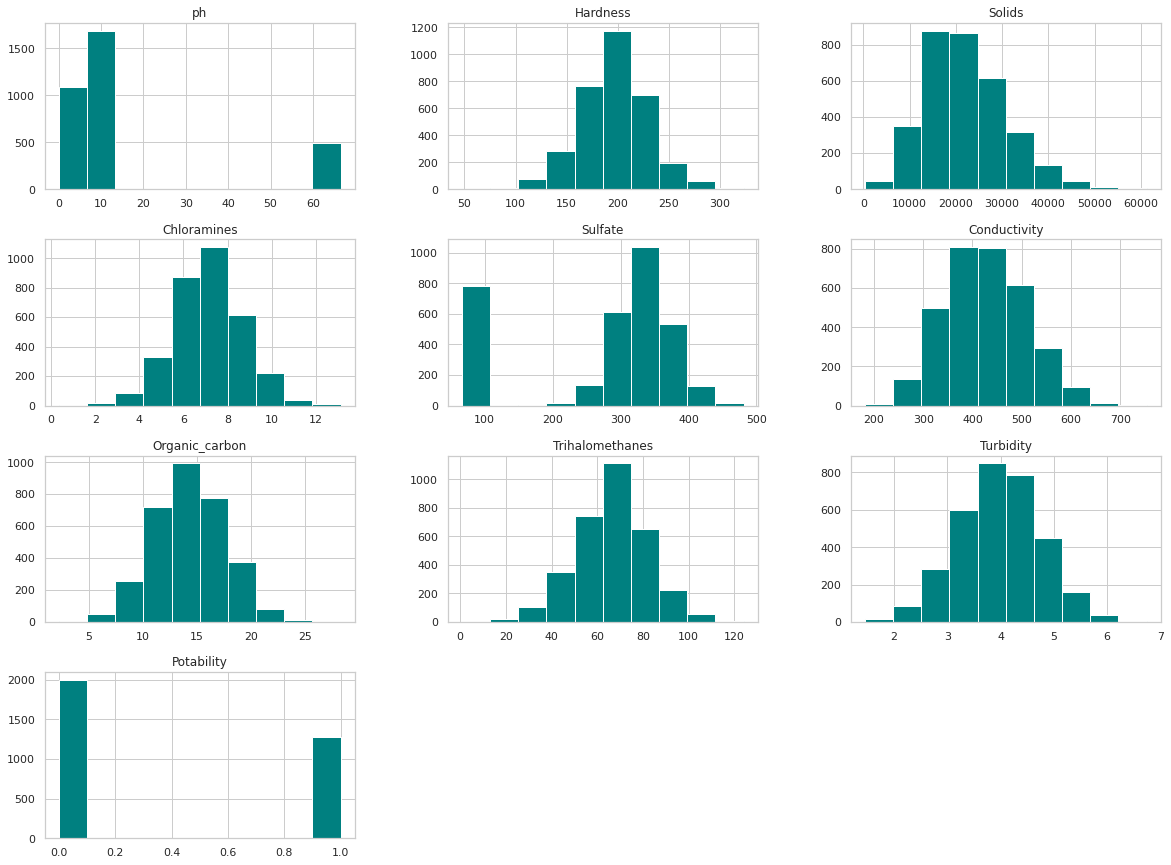

In [366]:
df.hist(bins=10, figsize=(20,15), color = 'teal')

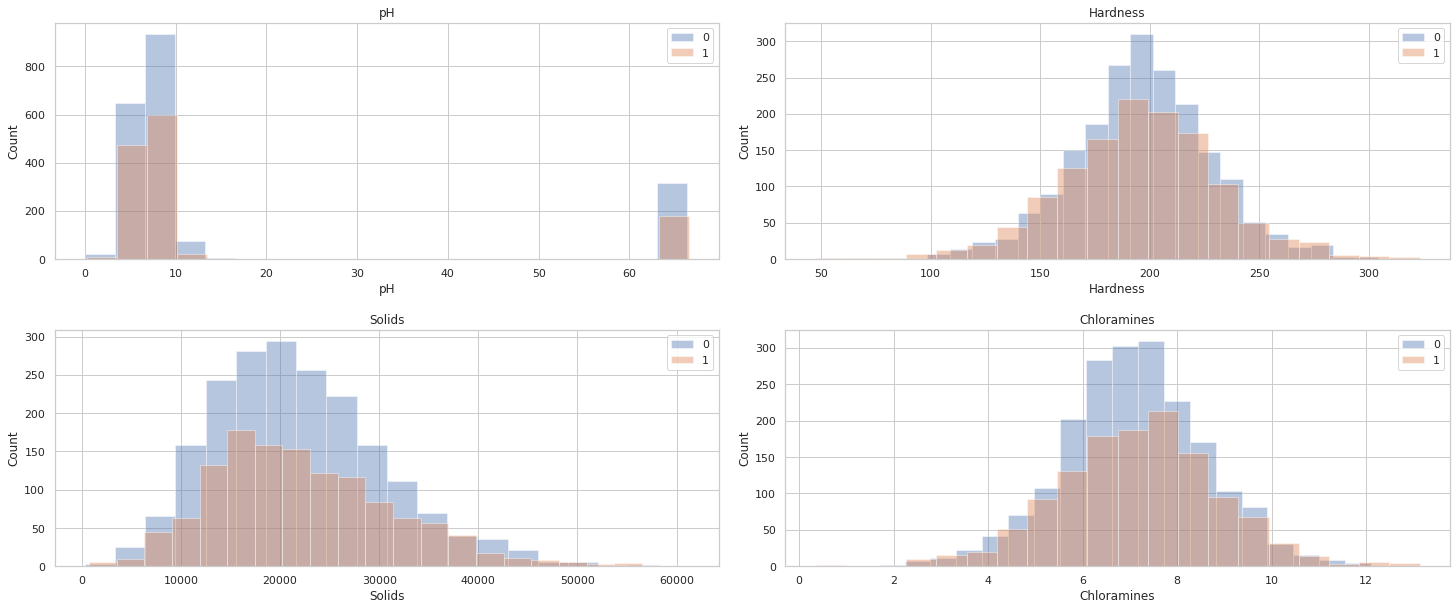

In [367]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,10))
 
p1 = fig.add_subplot(2,2,1)
p1.hist(df.ph[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.ph[df.Potability == 1], bins=20, alpha = .4)
plt.title('pH')
plt.xlabel('pH')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)

p1 = fig.add_subplot(2,2,2)
p1.hist(df.Hardness[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.Hardness[df.Potability == 1], bins=20, alpha = .4)
plt.title('Hardness')
plt.xlabel('Hardness')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)

p1 = fig.add_subplot(2,2,3)
p1.hist(df.Solids[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.Solids[df.Potability == 1], bins=20, alpha = .4)
plt.title('Solids')
plt.xlabel('Solids')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)

p1 = fig.add_subplot(2,2,4)
p1.hist(df.Chloramines[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.Chloramines[df.Potability == 1], bins=20, alpha = .4)
plt.title('Chloramines')
plt.xlabel('Chloramines')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)
 
plt.subplots_adjust(wspace=.1, hspace=.3)
plt.show()

Text(0, 0.5, 'Frequency')

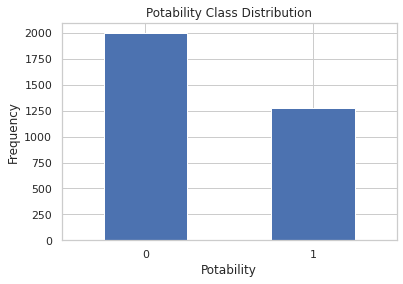

In [368]:
count_classes = pd.value_counts(y,sort=True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Potability Class Distribution")
plt.xticks(range(2))
plt.xlabel("Potability")
plt.ylabel("Frequency")

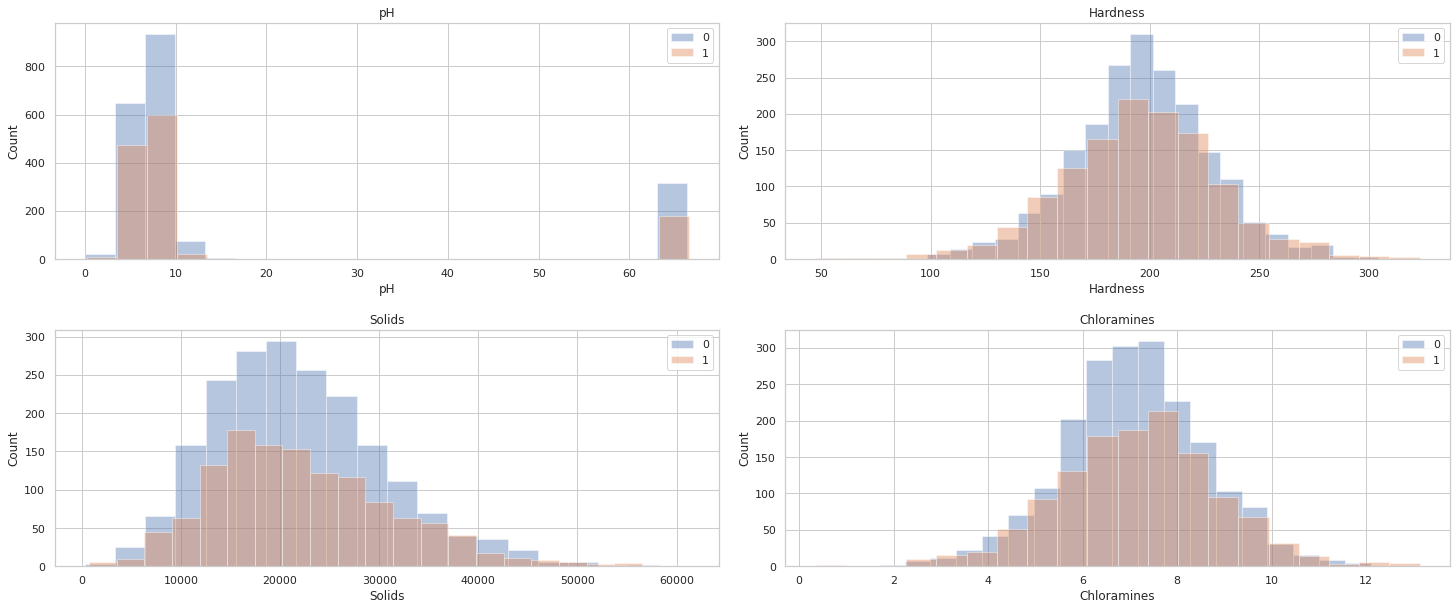

In [369]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,10))
 
p1 = fig.add_subplot(2,2,1)
p1.hist(df.ph[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.ph[df.Potability == 1], bins=20, alpha = .4)
plt.title('pH')
plt.xlabel('pH')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)

p1 = fig.add_subplot(2,2,2)
p1.hist(df.Hardness[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.Hardness[df.Potability == 1], bins=20, alpha = .4)
plt.title('Hardness')
plt.xlabel('Hardness')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)

p1 = fig.add_subplot(2,2,3)
p1.hist(df.Solids[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.Solids[df.Potability == 1], bins=20, alpha = .4)
plt.title('Solids')
plt.xlabel('Solids')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)

p1 = fig.add_subplot(2,2,4)
p1.hist(df.Chloramines[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.Chloramines[df.Potability == 1], bins=20, alpha = .4)
plt.title('Chloramines')
plt.xlabel('Chloramines')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)
 
plt.subplots_adjust(wspace=.1, hspace=.3)
plt.show()

#Over Sampling

In [370]:
zero = df[df['Potability']==0]
one = df[df['Potability']==1]

In [371]:
print(zero.shape,one.shape)

(1998, 10) (1278, 10)


In [372]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_res, y_res = oversample.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [373]:
x_res.shape,y_res.shape


((3996, 9), (3996,))

Text(0, 0.5, 'Frequency')

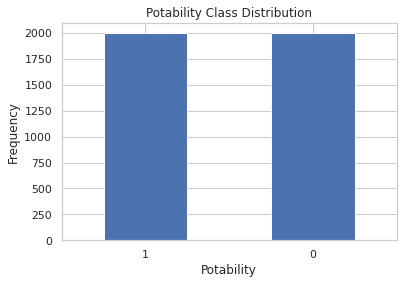

In [374]:
count_classes = pd.value_counts(y_res,sort=True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Potability Class Distribution")
plt.xticks(range(2))
plt.xlabel("Potability")
plt.ylabel("Frequency")

# Classifiers

In [375]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [376]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [377]:
randomForestClassifier = RandomForestClassifier(n_estimators = 1000)

In [378]:
scores = cross_val_score(randomForestClassifier, x_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)

In [379]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.841 (0.012)


In [380]:
#to plot accuracy bar
accuracy_list ={}
accuracy_list["K fold with Random Forest"] = (mean(scores))

In [381]:
# fit model no training data

from xgboost import XGBClassifier

xgbClassifier = XGBClassifier()
scores = cross_val_score(xgbClassifier, x_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)

In [382]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.762 (0.017)


In [383]:
accuracy_list["K fold with XG Boost"] = (mean(scores))
print(accuracy_list)

{'K fold with Random Forest': 0.8410864661654134, 'K fold with XG Boost': 0.7622537593984963}


In [384]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify = y)
y_train = pd.Series(y_train)

In [385]:
from sklearn.metrics import accuracy_score
#Random Forest
randomForestClassifier = RandomForestClassifier(n_estimators = 1000)
randomForestClassifier.fit(x_train, y_train.values.ravel())
predictionsRandomForestClassifier = randomForestClassifier.predict(x_test)
accuracyRandomForestClassifier = accuracy_score(predictionsRandomForestClassifier, y_test)
print(accuracyRandomForestClassifier)

0.8079268292682927


In [386]:
accuracy_list["Random Forest"] = accuracyRandomForestClassifier*100
print(accuracy_list)

{'K fold with Random Forest': 0.8410864661654134, 'K fold with XG Boost': 0.7622537593984963, 'Random Forest': 80.79268292682927}


In [387]:
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train,verbose=True)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [388]:

# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [389]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.59%


In [390]:

accuracy_list["XG Boost"] = accuracy*100
print(accuracy_list)

{'K fold with Random Forest': 0.8410864661654134, 'K fold with XG Boost': 0.7622537593984963, 'Random Forest': 80.79268292682927, 'XG Boost': 77.59146341463415}


In [391]:
import matplotlib.pyplot as plt
accuracy_list['K fold with Random Forest'] = accuracy_list['K fold with Random Forest']*1000
accuracy_list['K fold with XG Boost']= accuracy_list['K fold with XG Boost']*1000
print(accuracy_list)


{'K fold with Random Forest': 841.0864661654134, 'K fold with XG Boost': 762.2537593984963, 'Random Forest': 80.79268292682927, 'XG Boost': 77.59146341463415}


In [392]:
accuracy_list['K fold with Random Forest'] = accuracy_list['K fold with Random Forest']/10
accuracy_list['K fold with XG Boost']= accuracy_list['K fold with XG Boost']/10
print(accuracy_list)

{'K fold with Random Forest': 84.10864661654134, 'K fold with XG Boost': 76.22537593984963, 'Random Forest': 80.79268292682927, 'XG Boost': 77.59146341463415}


Text(0.5, 0.98, 'Categorical Plotting')

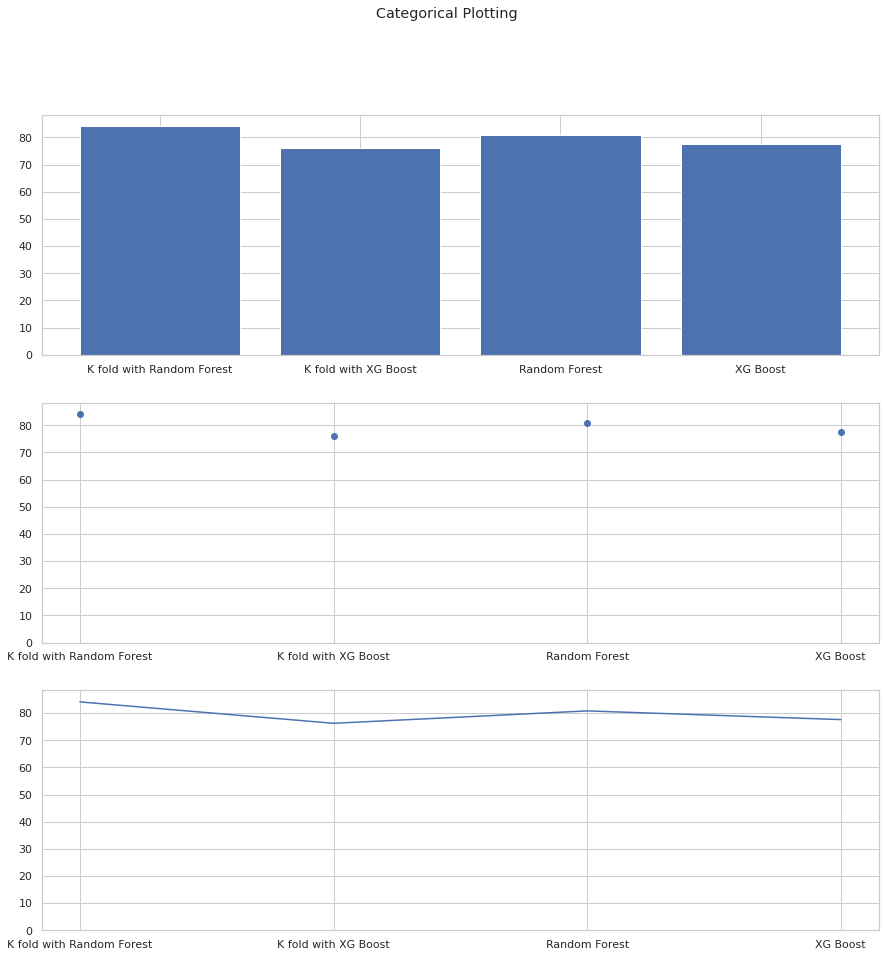

In [393]:
names = list(accuracy_list.keys())
values = list(accuracy_list.values())

fig, axs = plt.subplots(3,1, figsize=(15, 15), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')